In [1]:
# Impoting required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.lines as mlines

# setting default option
pd.set_option("mode.copy_on_write", True)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# loading the Datasets
mortality = pd.read_parquet("../../Data/processed/mortality_corrected.parquet")
shipment = pd.read_parquet("../../Data/processed/shipment_corrected.parquet")

In [3]:
mortality.sample(5)

,State,State_Code,County,County_Code,Year,Deaths,Population,Mortality_Rate
7521,North Carolina,NC,LEE,37105,2010,5,57879.0,0.000086
1890,Florida,FL,ORANGE,12095,2011,125,1170699.0,0.000107
8705,Oregon,OR,DOUGLAS,41019,2010,9,107637.0,0.000084
1822,Florida,FL,MARTIN,12085,2008,22,144369.0,0.000152
1440,Connecticut,CT,NEW HAVEN,09009,2005,81,847162.0,0.000096


In [4]:
shipment.sample(5)

,BUYER_STATE,BUYER_COUNTY,YEAR,MME,countyfips,Population
21731,MT,LINCOLN,2012,1.447219e+07,30053,19494
2691,CA,SAN JOAQUIN,2007,1.613317e+08,06077,668080
15798,MD,ALLEGANY,2011,4.914885e+07,24001,74580
28053,OH,SHELBY,2014,1.062756e+07,39149,49001
35600,TX,GILLESPIE,2009,4.285714e+06,48171,24608


In [5]:
# Creating control variables

# Enter the Test State Below
test_state = "WA"

# Enter list of states required below, Included the test state
state_list = ["WA", "OR", "WI", "NJ"]

# Year control variable
policy_year = 2012  # year the policy was implemented
start_year = 2008  # desired start year for analysis
end_year = 2015  # desired end year for analysis

In [6]:
# subset the data
mortality = mortality[mortality["State_Code"].isin(state_list)]
mortality = mortality[
    (mortality["Year"] >= start_year) & (mortality["Year"] <= end_year)
]

In [7]:
# check number of times each county appears in the data
mortality["County_Code"].value_counts().value_counts()

count
8    86
Name: count, dtype: int64

In [8]:
# Add columns to tag the rows for pre-post policy implementation and test-control

# Tagging the rows for pre-post policy implementation
mortality["policy_implementation"] = mortality["Year"] >= policy_year

# Tagging the rows for test-control
mortality["State_Type"] = mortality["State_Code"].apply(
    lambda x: "Test" if x == test_state else "Control"
)

In [9]:
mortality.sample(5)

,State,State_Code,County,County_Code,Year,Deaths,Population,Mortality_Rate,policy_implementation,State_Type
12211,Wisconsin,WI,SAINT CROIX,55109,2009,8,84055.0,0.000095,False,Control
12223,Wisconsin,WI,SAUK,55111,2008,7,61231.0,0.000114,False,Control
11971,Wisconsin,WI,BROWN,55009,2015,19,257916.0,0.000074,True,Control
8807,Oregon,OR,POLK,41053,2008,6,74346.0,0.000081,False,Control
6245,New Jersey,NJ,MERCER,34021,2012,31,368628.0,0.000084,True,Control


In [10]:
mortality_2 = (
    mortality.groupby(["State_Code", "Year", "policy_implementation"])
    .agg({"Mortality_Rate": "mean"})
    .reset_index()
)

In [11]:
mortality_2.sample(5)

,State_Code,Year,policy_implementation,Mortality_Rate
29,WI,2013,True,0.000126
15,OR,2015,True,0.000095
19,WA,2011,False,0.000126
21,WA,2013,True,0.000121
12,OR,2012,True,0.000089


Text(-5.859374999999991, 0.5, 'Mortality Rate Per-Capita')

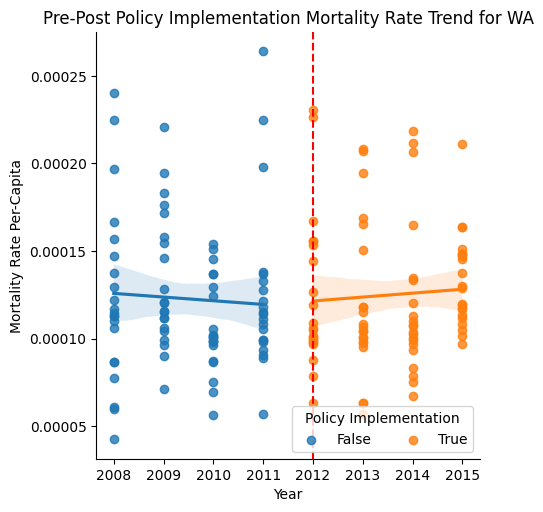

In [12]:
plot = sns.lmplot(
    data=mortality[mortality["State_Code"] == test_state],
    x="Year",
    y="Mortality_Rate",
    hue="policy_implementation",
    legend=False,
)
plot.set(title=f"Pre-Post Policy Implementation Mortality Rate Trend for {test_state}")

plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]

ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Mortality Rate Per-Capita")

Text(-5.984374999999991, 0.5, 'Mortality Rate Per-Capita')

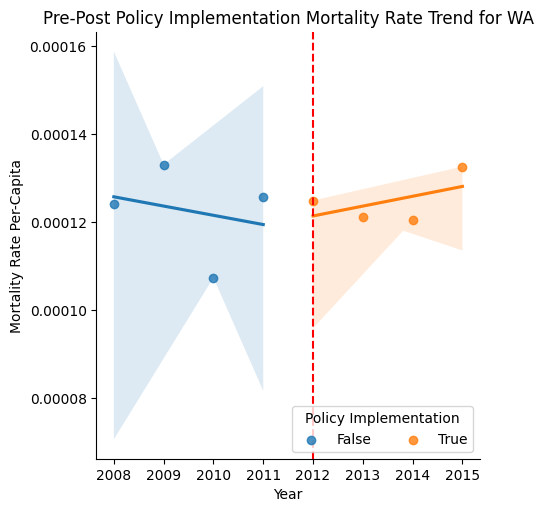

In [13]:
plot = sns.lmplot(
    data=mortality_2[mortality_2["State_Code"] == test_state],
    x="Year",
    y="Mortality_Rate",
    hue="policy_implementation",
    legend=False,
)
plot.set(title=f"Pre-Post Policy Implementation Mortality Rate Trend for {test_state}")

plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]

ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Mortality Rate Per-Capita")

Text(-26.109374999999993, 0.5, 'Mortality Rate Per-Capita')

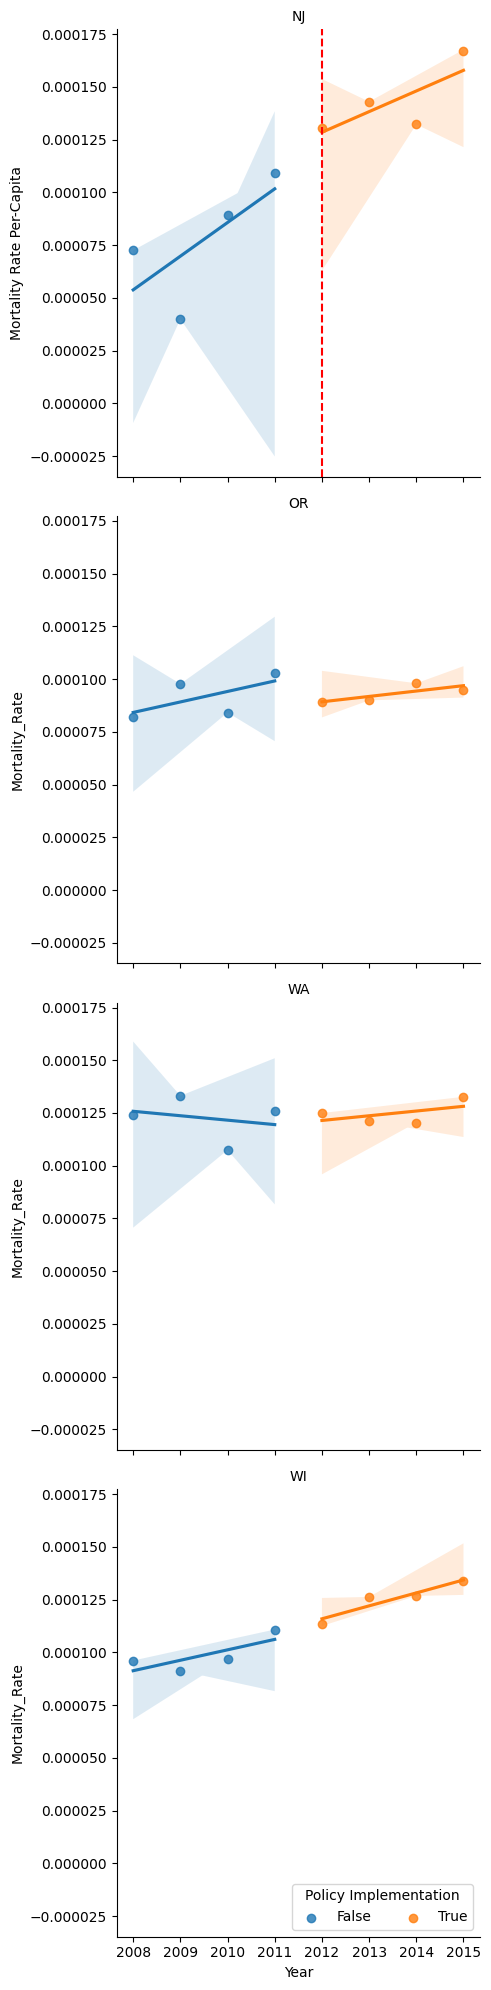

In [14]:
plot = sns.lmplot(
    data=mortality_2,
    x="Year",
    y="Mortality_Rate",
    hue="policy_implementation",
    legend=False,
    row="State_Code",
)

# Set titles for each subplot
plot = plot.set_titles("{row_name}")

plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]

ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Mortality Rate Per-Capita")

Text(-5.859374999999991, 0.5, 'Mortality Rate Per-Capita')

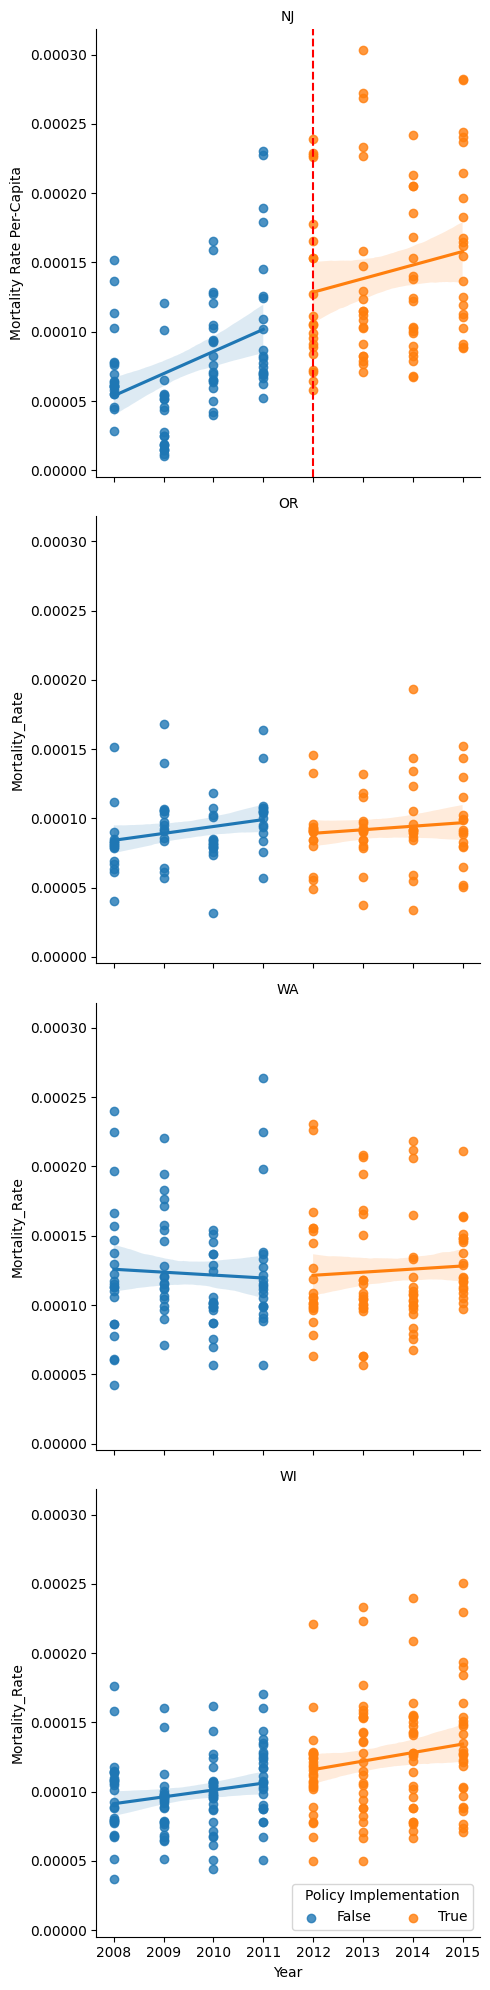

In [15]:
plot = sns.lmplot(
    data=mortality,
    x="Year",
    y="Mortality_Rate",
    hue="policy_implementation",
    legend=False,
    row="State_Code",
)

# Set titles for each subplot
plot = plot.set_titles("{row_name}")

plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]

ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Mortality Rate Per-Capita")

In [16]:
mortality_3 = (
    mortality.groupby(["State_Type", "Year", "policy_implementation"])
    .agg({"Mortality_Rate": "mean"})
    .reset_index()
)
mortality_3.sample(5)

,State_Type,Year,policy_implementation,Mortality_Rate
6,Control,2014,True,0.000121
3,Control,2011,False,0.000108
7,Control,2015,True,0.000135
15,Test,2015,True,0.000133
0,Control,2008,False,0.000085


In [17]:
mortality_3["hue_separator"] = (
    mortality_3["State_Type"]
    + " State-"
    + mortality_3["policy_implementation"].astype(str)
)

# Unify the color on the legend

## Washington State

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


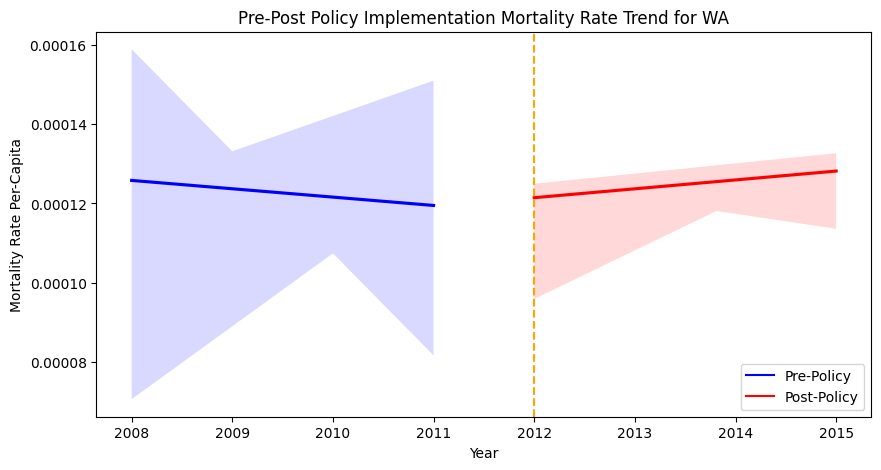

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plotting the pre-post graph
color = "red"
sns.regplot(
    data=mortality_2[
        (mortality_2["State_Code"] == test_state)
        & (mortality_2["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

# plotting the pre-post graph
color = "blue"
sns.regplot(
    data=mortality_2[
        (mortality_2["State_Code"] == test_state)
        & (mortality_2["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

# adding legends
plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

# addding vertical line
ax.axvline(policy_year, ls="--", color="orange")

# creating custom legend handles
blue_line = mlines.Line2D([], [], color="blue", label="Pre-Policy")
red_line = mlines.Line2D([], [], color="red", label="Post-Policy")

# adding legends
plt.legend(handles=[blue_line, red_line], loc="lower right")
plt.title(f"Pre-Post Policy Implementation Mortality Rate Trend for {test_state}")
plt.ylabel("Mortality Rate Per-Capita")

plt.savefig(f"../../Plots/{test_state}_pp_mortality.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


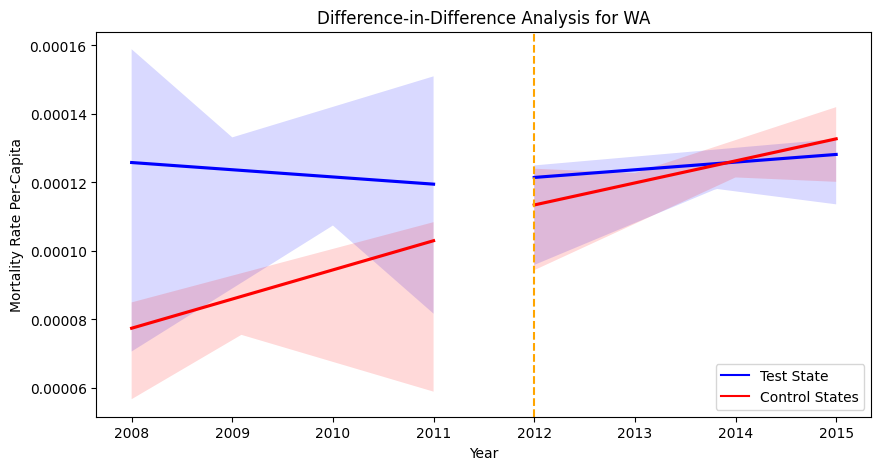

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plotting for test state
color = "blue"
sns.regplot(
    data=mortality_3[
        (mortality_3["State_Type"] == "Test")
        & (mortality_3["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

sns.regplot(
    data=mortality_3[
        (mortality_3["State_Type"] == "Test")
        & (mortality_3["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

# plotting for control states
color = "red"
sns.regplot(
    data=mortality_3[
        (mortality_3["State_Type"] == "Control")
        & (mortality_3["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

sns.regplot(
    data=mortality_3[
        (mortality_3["State_Type"] == "Control")
        & (mortality_3["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)
# adding legends
plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

# addding vertical line
ax.axvline(policy_year, ls="--", color="orange")

# creating custom legend handles
blue_line = mlines.Line2D([], [], color="blue", label="Test State")
red_line = mlines.Line2D([], [], color="red", label="Control States")

# adding legends
plt.legend(handles=[blue_line, red_line], loc="lower right")
plt.title(f"Difference-in-Difference Analysis for {test_state}")
plt.ylabel("Mortality Rate Per-Capita")

plt.savefig(f"../../Plots/{test_state}_did_mortality.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


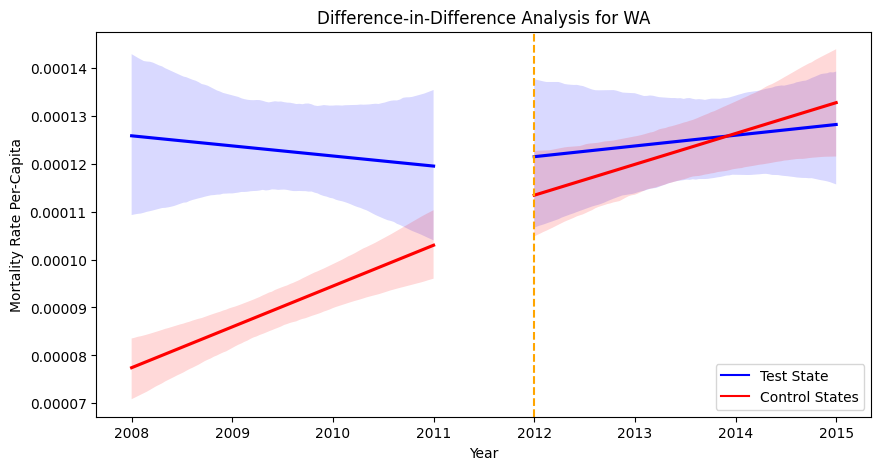

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plotting for test state
color = "blue"
sns.regplot(
    data=mortality[
        (mortality["State_Type"] == "Test")
        & (mortality["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

sns.regplot(
    data=mortality[
        (mortality["State_Type"] == "Test")
        & (mortality["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

# plotting for control states
color = "red"
sns.regplot(
    data=mortality[
        (mortality["State_Type"] == "Control")
        & (mortality["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

sns.regplot(
    data=mortality[
        (mortality["State_Type"] == "Control")
        & (mortality["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)
# adding legends
plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

# addding vertical line
ax.axvline(policy_year, ls="--", color="orange")

# creating custom legend handles
blue_line = mlines.Line2D([], [], color="blue", label="Test State")
red_line = mlines.Line2D([], [], color="red", label="Control States")

# adding legends
plt.legend(handles=[blue_line, red_line], loc="lower right")
plt.title(f"Difference-in-Difference Analysis for {test_state}")
plt.ylabel("Mortality Rate Per-Capita")

plt.savefig(f"../../Plots/{test_state}_did_mortality.png")

## Florida State

In [21]:
# Creating control variables

# Enter the Test State Below
test_state_FL = "FL"

# Enter list of states required below, Included the test state
state_list_FL = ["FL", "NC", "LA", "GA"]

# Year control variable
policy_year_FL = 2010  # year the policy was implemented
start_year_FL = 2007  # desired start year for analysis
end_year_FL = 2013  # desired end year for analysis

Text(-5.859374999999991, 0.5, 'Mortality Rate Per-Capita')

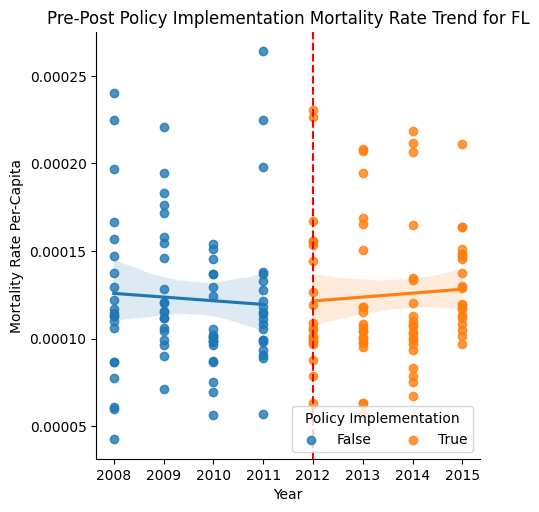

In [22]:
plot = sns.lmplot(
    data=mortality[mortality["State_Code"] == test_state],
    x="Year",
    y="Mortality_Rate",
    hue="policy_implementation",
    legend=False,
)
plot.set(
    title=f"Pre-Post Policy Implementation Mortality Rate Trend for {test_state_FL}"
)

plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]

ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Mortality Rate Per-Capita")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


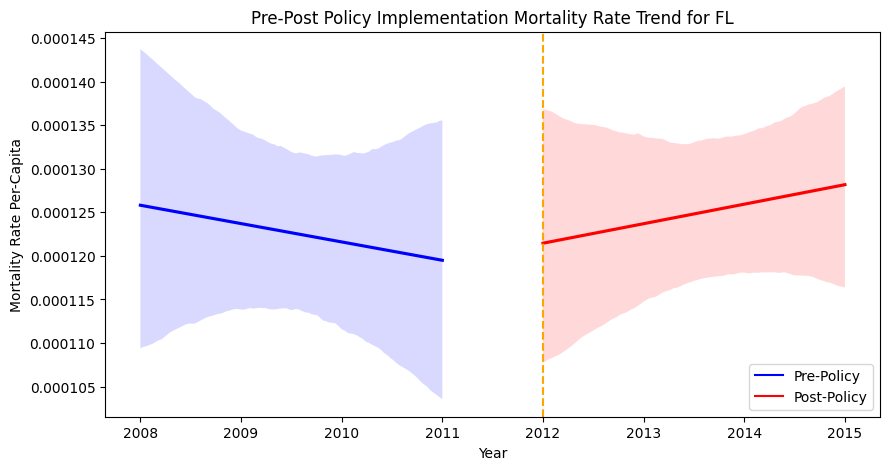

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plotting the pre-post graph
color = "red"
sns.regplot(
    data=mortality[
        (mortality["State_Code"] == test_state)
        & (mortality["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

# plotting the pre-post graph
color = "blue"
sns.regplot(
    data=mortality[
        (mortality["State_Code"] == test_state)
        & (mortality["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

# adding legends
plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

# addding vertical line
ax.axvline(policy_year, ls="--", color="orange")

# creating custom legend handles
blue_line = mlines.Line2D([], [], color="blue", label="Pre-Policy")
red_line = mlines.Line2D([], [], color="red", label="Post-Policy")

# adding legends
plt.legend(handles=[blue_line, red_line], loc="lower right")
plt.title(f"Pre-Post Policy Implementation Mortality Rate Trend for {test_state_FL}")
plt.ylabel("Mortality Rate Per-Capita")

plt.savefig(f"../../Plots/{test_state_FL}_pp_mortality.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


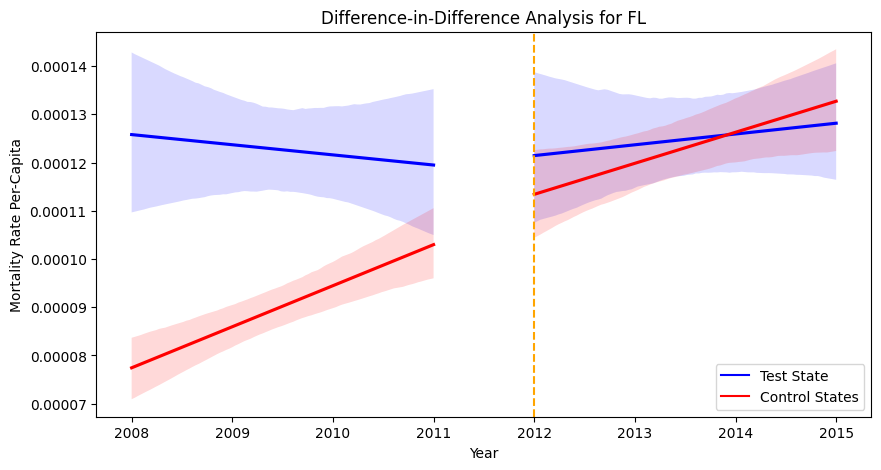

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plotting for test state
color = "blue"
sns.regplot(
    data=mortality[
        (mortality["State_Type"] == "Test")
        & (mortality["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

sns.regplot(
    data=mortality[
        (mortality["State_Type"] == "Test")
        & (mortality["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

# plotting for control states
color = "red"
sns.regplot(
    data=mortality[
        (mortality["State_Type"] == "Control")
        & (mortality["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

sns.regplot(
    data=mortality[
        (mortality["State_Type"] == "Control")
        & (mortality["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)
# adding legends
plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

# addding vertical line
ax.axvline(policy_year, ls="--", color="orange")

# creating custom legend handles
blue_line = mlines.Line2D([], [], color="blue", label="Test State")
red_line = mlines.Line2D([], [], color="red", label="Control States")

# adding legends
plt.legend(handles=[blue_line, red_line], loc="lower right")
plt.title(f"Difference-in-Difference Analysis for {test_state_FL}")
plt.ylabel("Mortality Rate Per-Capita")

plt.savefig(f"../../Plots/{test_state_FL}_did_mortality.png")